In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Decision Trees

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

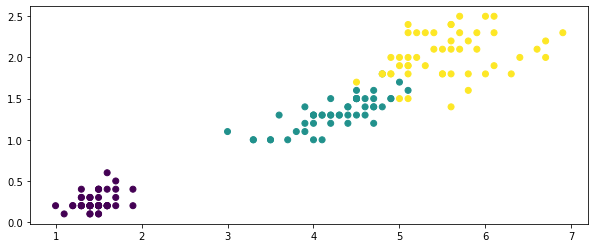

In [3]:
plt.figure(figsize=(10, 4))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Wizualizacja
Możesz wizualizować nauczone drzewo decyzyjne, najpierw używając metody **export_graphviz()**, aby stworzyć plik definicji wykresu o nazwie iris_tree.dot:

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="./iris_tree1.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Następnie możesz przekonwertować ten plik .dot na różne formaty, takie jak PDF lub PNG, za pomocą graphviz.

http://www.graphviz.org/

C:\Program Files (x86)\Graphviz2.38\bin

In [6]:
!dot -Tpng iris_tree1.dot -o iris_tree1.png

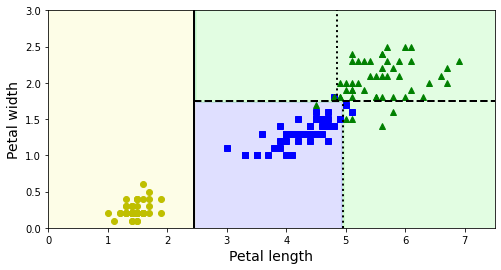

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
# plt.text(1.40, 1.0, "Depth=0", fontsize=15)
# plt.text(3.2, 1.80, "Depth=1", fontsize=13)
# plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [8]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [9]:
tree_clf.predict([[5, 1.5]])

array([2])

In [10]:
from mlxtend.plotting import plot_decision_regions

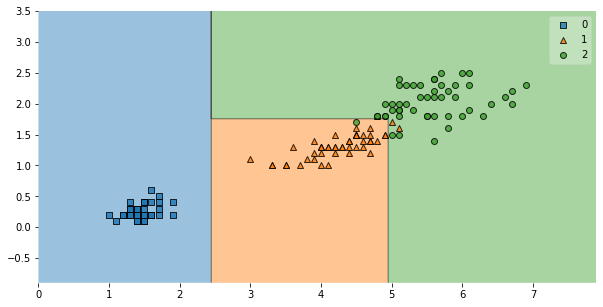

In [11]:
plt.figure(figsize=(10, 5))
plot_decision_regions(X, y, tree_clf)
plt.show()

# Zad.

Naucz 

```pyrhon
DecisionTreeClassifier(max_depth=10, random_state=42)
```

* narysuj graf
* narysuj punkty oraz granice decyzyjne

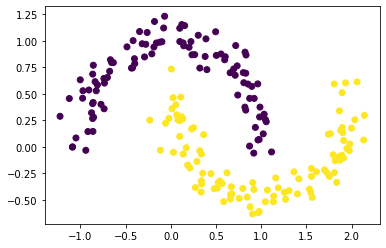

In [30]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=.1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [31]:
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [32]:
export_graphviz(
        tree_clf,
        out_file="./moons_tree.dot",
        feature_names=['X', 'y'],
        class_names=['purple', 'yellow'],
        rounded=True,
        filled=True
    )

In [33]:
!dot -Tpng moons_tree.dot -o moons_tree.png

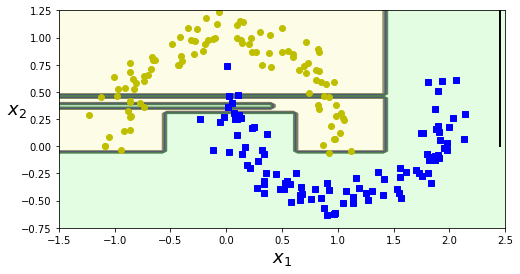

In [34]:

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -0.75, 1.25], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y, iris=False)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
# plt.text(1.40, 1.0, "Depth=0", fontsize=15)
# plt.text(3.2, 1.80, "Depth=1", fontsize=13)
# plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [35]:
tree_clf.predict_proba([[5, 1.5]])

array([[0., 1.]])

In [36]:
tree_clf.predict([[5, 1.5]])

array([1], dtype=int64)

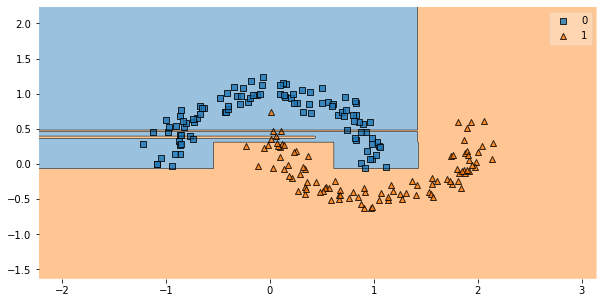

In [37]:
plt.figure(figsize=(10, 5))
plot_decision_regions(X, y, tree_clf)
plt.show()

# Zad.

Porównaj wyniki z 

```python
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
```

In [38]:
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42, min_samples_leaf=4, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       random_state=42)

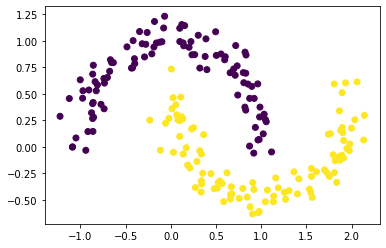

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [40]:
export_graphviz(
        tree_clf,
        out_file="./moons_tree2.dot",
        feature_names=["X", "y"],
        class_names=['purple', 'yellow'],
        rounded=True,
        filled=True
    )

In [41]:
!dot -Tpng moons_tree2.dot -o moons_tree2.png

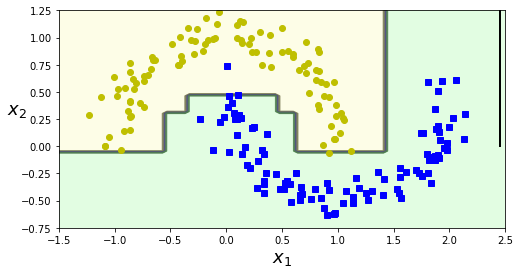

In [42]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y, iris=False)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)

plt.show()

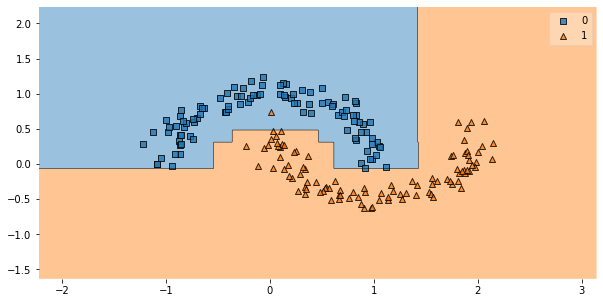

In [43]:
plt.figure(figsize=(10, 5))
plot_decision_regions(X, y, tree_clf)
plt.show()

# Zad 

Dla obu wyników policz 

* precision
* recall
* f1-score
* accuracy
* roc_auc_score

i narysuj krzywą roc